In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1_C1 = pd.read_csv("EIS_state_I_25C01.csv",sep=',', header=0, index_col=False)
df1_C1.head(5)

df_C2 = pd.read_csv("EIS_state_I_25C02.csv",sep=',', header=0, index_col=False)
df_C3 = pd.read_csv("EIS_state_I_25C03.csv",sep=',', header=0, index_col=False)
df_C4 = pd.read_csv("EIS_state_I_25C04.csv",sep=',', header=0, index_col=False)
df_C5 = pd.read_csv("EIS_state_I_25C05.csv",sep=',', header=0, index_col=False)
df_C6 = pd.read_csv("EIS_state_I_25C06.csv",sep=',', header=0, index_col=False)

## Ciclos dentro de un archivo

* Cada batería ha sido cargada y descargada en un total de 350 ciclos. 
* La información de estos 350 ciclos está plasmada en el archivo de una única batería.
* Para cada ciclo hay un total de **60** muestras. Es decir, se tiene un total de **21.000** filas.

In [22]:
# Funciones para extraer resistencias (R) y reactancias (X).

def cycle_resistances(dataFrame):
    # Input: Txt de la base de datos de EIS Cambridge como DataFrame
    # Output: Lista con 350 listas. Cada una son los valores de resistencia
    #         de un mismo ciclo

    resistance_arrays = []
    for i in range(1,351):
        df1 = dataFrame[dataFrame["cycle number"]==i].copy(deep=True)
        reZ = df1["Re(Z)/Ohm"].to_list()
        resistance_arrays.append(reZ)
    return resistance_arrays

def cycle_reactances(dataFrame):
    # Input: Txt de la base de datos de EIS Cambridge como DataFrame
    # Output: Lista con 350 listas. Cada una son los valores de reactancia
    #         de un mismo ciclo
    reactance_arrays = []
    for i in range(1,351):
        df1 = dataFrame[dataFrame["cycle number"]==i].copy(deep=True)
        imZ = df1["-Im(Z)/Ohm"].to_list()
        reactance_arrays.append(imZ)
    return reactance_arrays

Text(0.5, 0, 'Re (Z)')

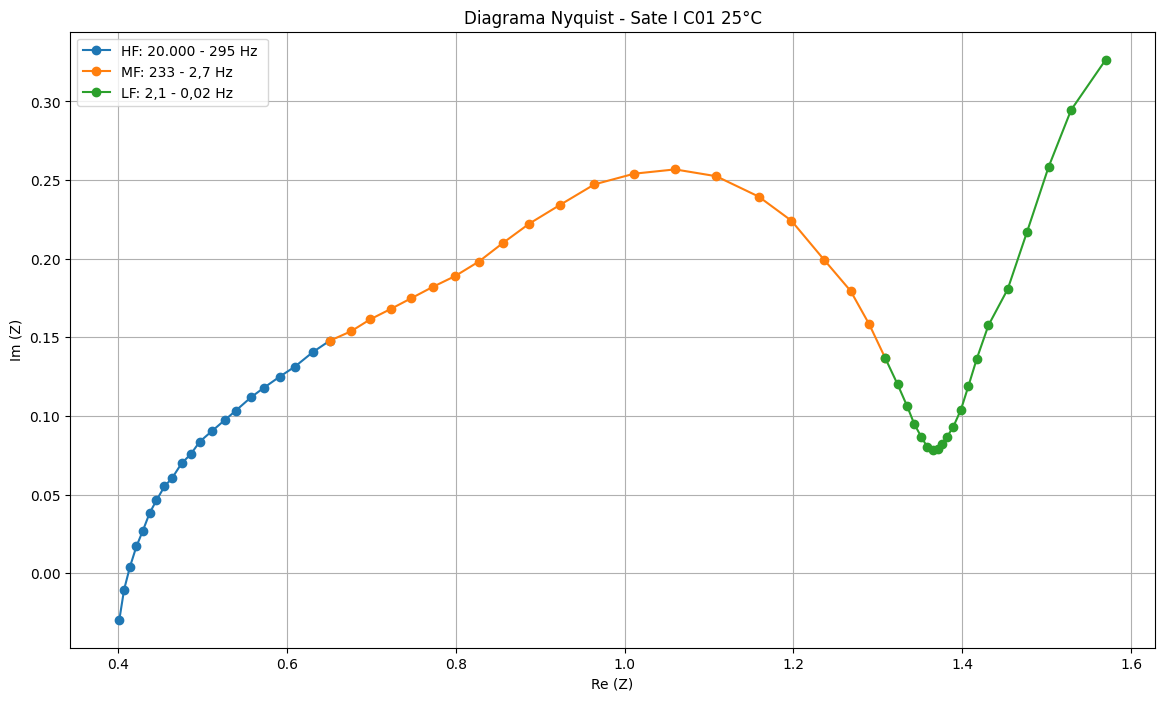

In [117]:
reZ = df1_C1["Re(Z)/Ohm"].to_list()
imZ = df1_C1["-Im(Z)/Ohm"].to_list()

plt.figure(figsize=(14,8))

plt.plot(reZ[0:20+1],imZ[0:20+1], marker='o', label="HF: 20.000 - 295 Hz ")
plt.plot(reZ[21-1:40+1],imZ[21-1:40+1], marker='o', label="MF: 233 - 2,7 Hz ")
plt.plot(reZ[41-1:60],imZ[41-1:60], marker='o', label="LF: 2,1 - 0,02 Hz ")
plt.legend()
plt.grid()
plt.title("Diagrama Nyquist - Sate I C01 25°C")
plt.ylabel("Im (Z)")
plt.xlabel("Re (Z)")


In [78]:
# Data Bateria 1
resistencias_C1 = cycle_resistances(df1_C1)
reactancias_C1 = cycle_reactances(df1_C1)
# Data Bateria 2
resistencias_C2 = cycle_resistances(df_C2)
reactancias_C2 = cycle_reactances(df_C2)
# Data Bateria 3
resistencias_C3 = cycle_resistances(df_C3)
reactancias_C3 = cycle_reactances(df_C3)
# Data Bateria4
resistencias_C4 = cycle_resistances(df_C4)
reactancias_C4 = cycle_reactances(df_C4)
# Dataa Bateria 5
resistencias_C5 = cycle_resistances(df_C5)
reactancias_C5 = cycle_reactances(df_C5)
# Data Bateria 6
resistencias_C6 = cycle_resistances(df_C6)
reactancias_C6 = cycle_reactances(df_C6)

(-0.2, 0.6)

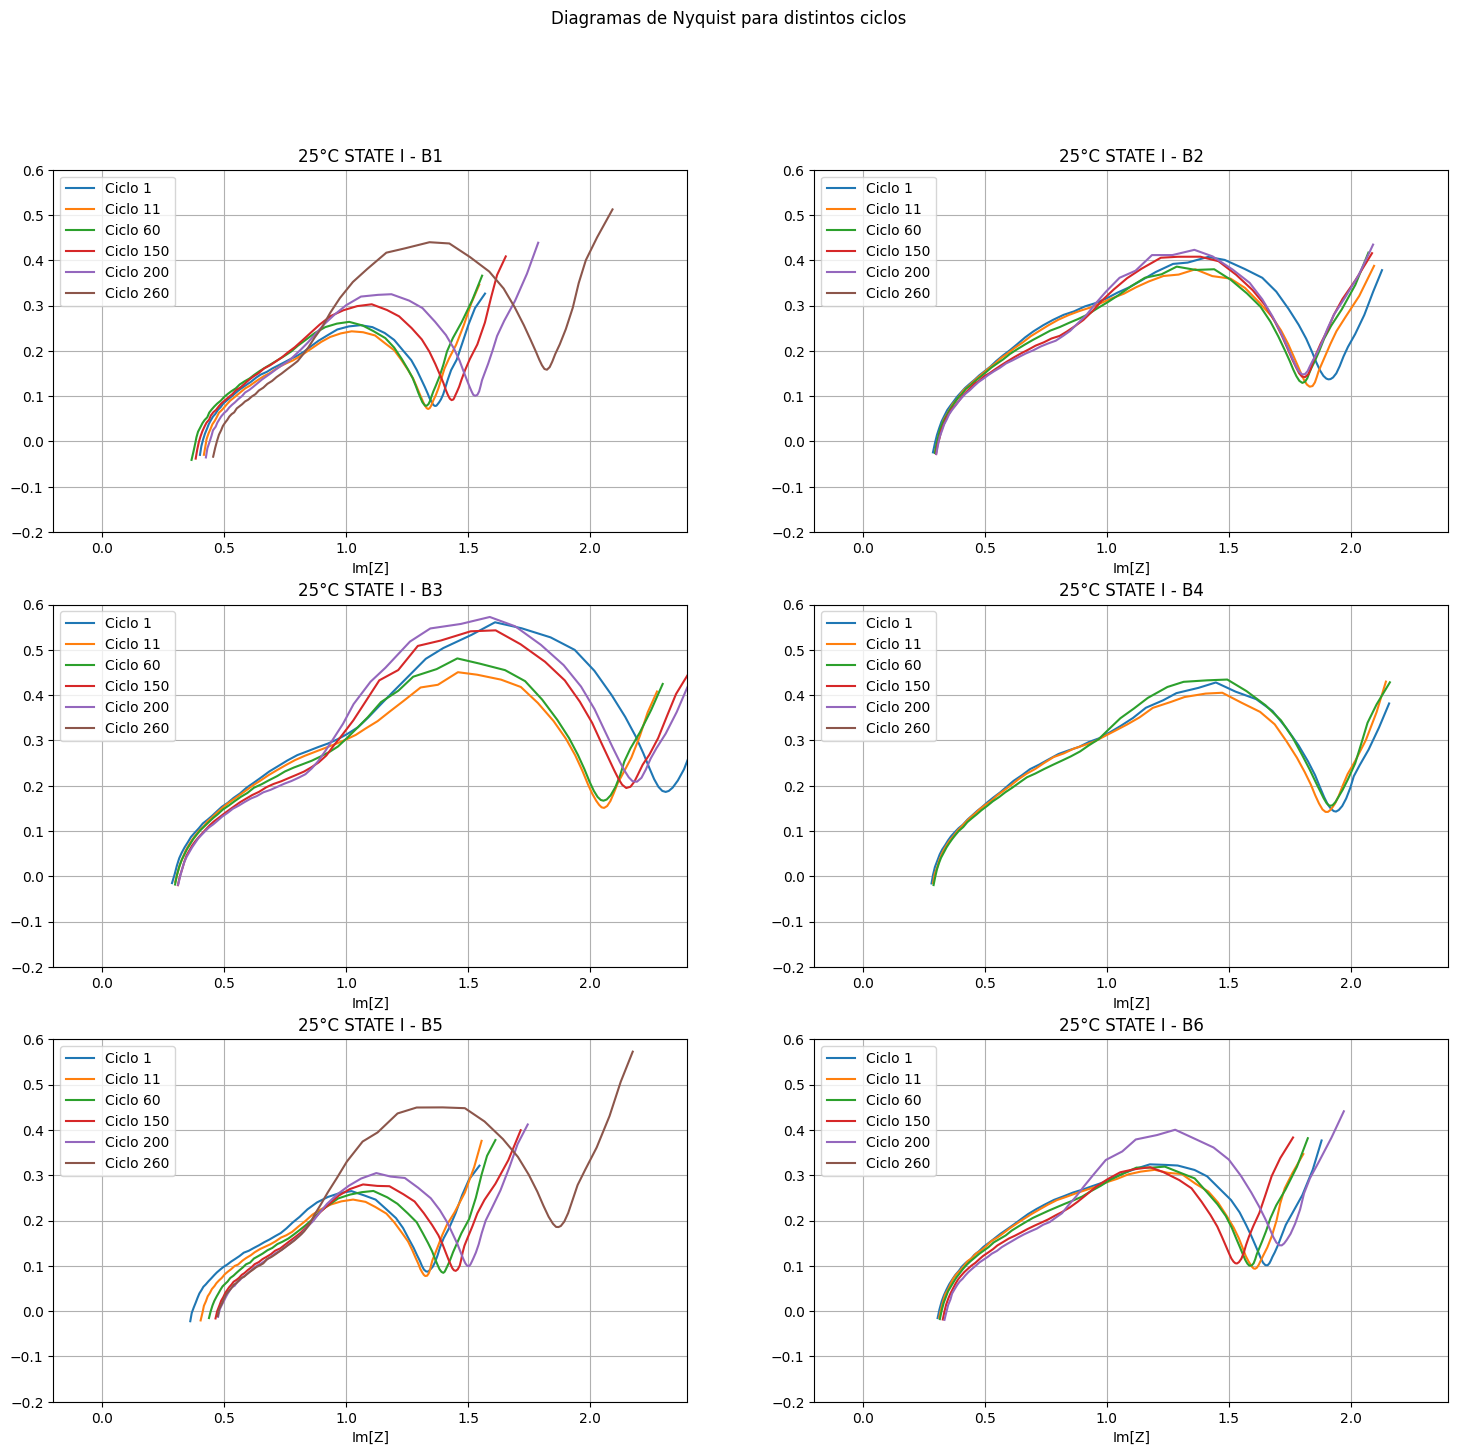

In [108]:
fig, axis = plt.subplots(nrows=3, ncols=2 ,figsize=(18,16))
fig.suptitle("Diagramas de Nyquist para distintos ciclos")

axis[0,0].plot(resistencias_C1[0], reactancias_C1[0], label="Ciclo 1")
axis[0,0].plot(resistencias_C1[10], reactancias_C1[10], label="Ciclo 11")
axis[0,0].plot(resistencias_C1[61], reactancias_C1[61], label="Ciclo 60")
axis[0,0].plot(resistencias_C1[151], reactancias_C1[151], label="Ciclo 150")
axis[0,0].plot(resistencias_C1[201], reactancias_C1[201], label="Ciclo 200")
axis[0,0].plot(resistencias_C1[261], reactancias_C1[261], label="Ciclo 260")
axis[0,0].legend()
axis[0,0].grid()
axis[0,0].set_title("25°C STATE I - B1")
axis[0,0].set_xlabel("Re[Z]")
axis[0,0].set_xlabel("Im[Z]")
axis[0,0].set_xlim(left= -0.2, right=2.4)
axis[0,0].set_ylim(bottom= -0.2, top=0.6)
axis[0,0].set_ylim()

axis[0,1].plot(resistencias_C2[0], reactancias_C2[0], label="Ciclo 1")
axis[0,1].plot(resistencias_C2[10], reactancias_C2[10], label="Ciclo 11")
axis[0,1].plot(resistencias_C2[61], reactancias_C2[61], label="Ciclo 60")
axis[0,1].plot(resistencias_C2[151], reactancias_C2[151], label="Ciclo 150")
axis[0,1].plot(resistencias_C2[201], reactancias_C2[201], label="Ciclo 200")
axis[0,1].plot(resistencias_C2[261], reactancias_C2[261], label="Ciclo 260")
axis[0,1].legend()
axis[0,1].grid()
axis[0,1].set_title("25°C STATE I - B2")
axis[0,1].set_xlabel("Re[Z]")
axis[0,1].set_xlabel("Im[Z]")
axis[0,1].set_xlim(left= -0.2, right=2.4)
axis[0,1].set_ylim(bottom= -0.2, top=0.6)

axis[1,0].plot(resistencias_C3[0], reactancias_C3[0], label="Ciclo 1")
axis[1,0].plot(resistencias_C3[10], reactancias_C3[10], label="Ciclo 11")
axis[1,0].plot(resistencias_C3[61], reactancias_C3[61], label="Ciclo 60")
axis[1,0].plot(resistencias_C3[151], reactancias_C3[151], label="Ciclo 150")
axis[1,0].plot(resistencias_C3[201], reactancias_C3[201], label="Ciclo 200")
axis[1,0].plot(resistencias_C3[261], reactancias_C3[261], label="Ciclo 260")
axis[1,0].legend()
axis[1,0].grid()
axis[1,0].set_title("25°C STATE I - B3")
axis[1,0].set_xlabel("Re[Z]")
axis[1,0].set_xlabel("Im[Z]")
axis[1,0].set_xlim(left= -0.2, right=2.4)
axis[1,0].set_ylim(bottom= -0.2, top=0.6)

axis[1,1].plot(resistencias_C4[0], reactancias_C4[0], label="Ciclo 1")
axis[1,1].plot(resistencias_C4[10], reactancias_C4[10], label="Ciclo 11")
axis[1,1].plot(resistencias_C4[61], reactancias_C4[61], label="Ciclo 60")
axis[1,1].plot(resistencias_C4[151], reactancias_C4[151], label="Ciclo 150")
axis[1,1].plot(resistencias_C4[201], reactancias_C4[201], label="Ciclo 200")
axis[1,1].plot(resistencias_C4[261], reactancias_C4[261], label="Ciclo 260")
axis[1,1].legend()
axis[1,1].grid()
axis[1,1].set_title("25°C STATE I - B4")
axis[1,1].set_xlabel("Re[Z]")
axis[1,1].set_xlabel("Im[Z]")
axis[1,1].set_xlim(left= -0.2, right=2.4)
axis[1,1].set_ylim(bottom= -0.2, top=0.6)

axis[2,0].plot(resistencias_C5[0], reactancias_C5[0], label="Ciclo 1")
axis[2,0].plot(resistencias_C5[10], reactancias_C5[10], label="Ciclo 11")
axis[2,0].plot(resistencias_C5[61], reactancias_C5[61], label="Ciclo 60")
axis[2,0].plot(resistencias_C5[151], reactancias_C5[151], label="Ciclo 150")
axis[2,0].plot(resistencias_C5[201], reactancias_C5[201], label="Ciclo 200")
axis[2,0].plot(resistencias_C5[261], reactancias_C5[261], label="Ciclo 260")
axis[2,0].legend()
axis[2,0].grid()
axis[2,0].set_title("25°C STATE I - B5")
axis[2,0].set_xlabel("Re[Z]")
axis[2,0].set_xlabel("Im[Z]")
axis[2,0].set_xlim(left= -0.2, right=2.4)
axis[2,0].set_ylim(bottom= -0.2, top=0.6)

axis[2,1].plot(resistencias_C6[0], reactancias_C6[0], label="Ciclo 1")
axis[2,1].plot(resistencias_C6[10], reactancias_C6[10], label="Ciclo 11")
axis[2,1].plot(resistencias_C6[61], reactancias_C6[61], label="Ciclo 60")
axis[2,1].plot(resistencias_C6[151], reactancias_C6[151], label="Ciclo 150")
axis[2,1].plot(resistencias_C6[201], reactancias_C6[201], label="Ciclo 200")
axis[2,1].plot(resistencias_C6[261], reactancias_C6[261], label="Ciclo 260")
axis[2,1].legend()
axis[2,1].grid()
axis[2,1].set_title("25°C STATE I - B6")
axis[2,1].set_xlabel("Re[Z]")
axis[2,1].set_xlabel("Im[Z]")
axis[2,1].set_xlim(left= -0.2, right=2.4)
axis[2,1].set_ylim(bottom= -0.2, top=0.6)

Text(0.5, 0, 'Re (Z)')

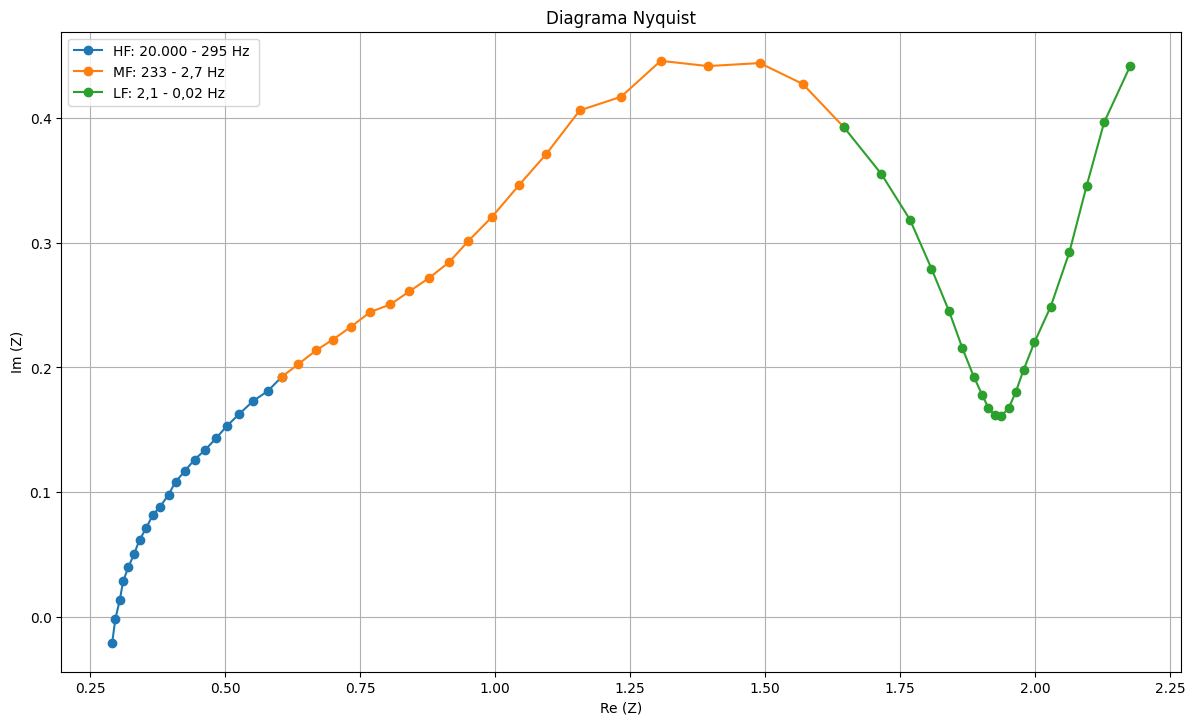

In [116]:
fig1 = plt.figure(figsize=(14,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
ax.plot(resistencias_C4[81][0:20+1],reactancias_C4[81][0:20+1], marker='o', label="HF: 20.000 - 295 Hz ")
ax.plot(resistencias_C4[81][21-1:40+1],reactancias_C4[81][21-1:40+1], marker='o', label="MF: 233 - 2,7 Hz ")
ax.plot(resistencias_C4[81][41-1:60],reactancias_C4[81][41-1:60], marker='o', label="LF: 2,1 - 0,02 Hz ")
ax.legend()
ax.grid()
ax.set_title("Diagrama Nyquist")
ax.set_ylabel("Im (Z)")
ax.set_xlabel("Re (Z)")


In [13]:
s1c3=pd.read_csv("EIS_state_I_25C03.csv",sep=',', header=0, index_col=False)
s2c3=pd.read_csv("EIS_state_II_25C03.csv",sep=',', header=0, index_col=False)
s3c3=pd.read_csv("EIS_state_III_25C03.csv",sep=',', header=0, index_col=False)
s4c3=pd.read_csv("EIS_state_IV_25C03.csv",sep=',', header=0, index_col=False)
s5c3=pd.read_csv("EIS_state_V_25C03.csv",sep=',', header=0, index_col=False)
s6c3=pd.read_csv("EIS_state_VI_25C03.csv",sep=',', header=0, index_col=False)

rs1b3 = cycle_resistances(s1c3)
rs2b3 = cycle_resistances(s2c3)
rs3b3 = cycle_resistances(s3c3)
rs4b3 = cycle_resistances(s4c3)
rs5b3 = cycle_resistances(s5c3)
rs6b3 = cycle_resistances(s6c3)

xs1b3 = cycle_reactances(s1c3)
xs2b3 = cycle_reactances(s2c3)
xs3b3 = cycle_reactances(s3c3)
xs4b3 = cycle_reactances(s4c3)
xs5b3 = cycle_reactances(s5c3)
xs6b3 = cycle_reactances(s6c3)

(-0.2, 0.6)

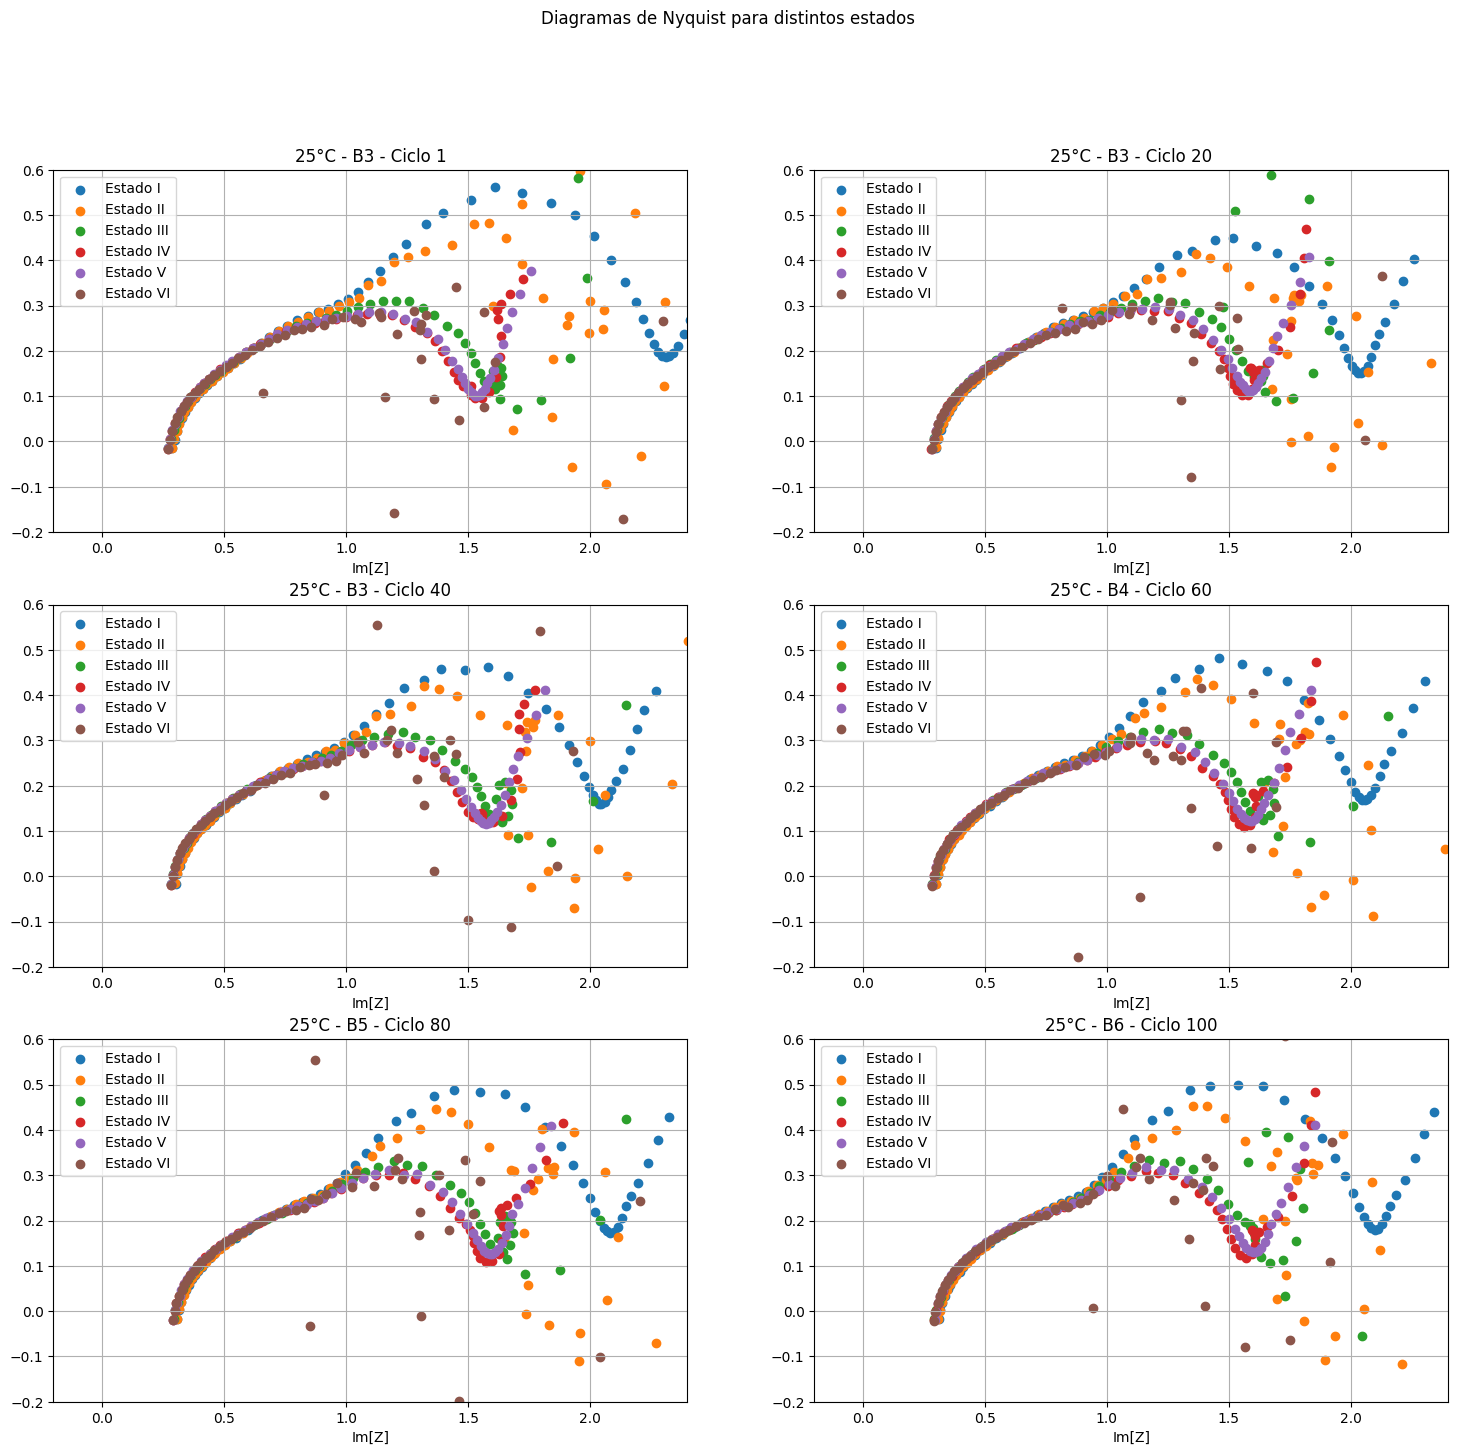

In [24]:
fig2, axis2 = plt.subplots(nrows=3, ncols=2 ,figsize=(18,16))
fig2.suptitle("Diagramas de Nyquist para distintos estados")

axis2[0,0].scatter(rs1b3[0], xs1b3[0], label="Estado I")
axis2[0,0].scatter(rs2b3[0], xs2b3[0], label="Estado II")
axis2[0,0].scatter(rs3b3[0], xs3b3[0], label="Estado III")
axis2[0,0].scatter(rs4b3[0], xs4b3[0], label="Estado IV")
axis2[0,0].scatter(rs5b3[0], xs5b3[0], label="Estado V")
axis2[0,0].scatter(rs6b3[0], xs6b3[0], label="Estado VI")
axis2[0,0].legend()
axis2[0,0].grid()
axis2[0,0].set_title("25°C - B3 - Ciclo 1")
axis2[0,0].set_xlabel("Re[Z]")
axis2[0,0].set_xlabel("Im[Z]")
axis2[0,0].set_xlim(left= -0.2, right=2.4)
axis2[0,0].set_ylim(bottom= -0.2, top=0.6)
axis2[0,0].set_ylim()

axis2[0,1].scatter(rs1b3[19], xs1b3[19], label="Estado I")
axis2[0,1].scatter(rs2b3[19], xs2b3[19], label="Estado II")
axis2[0,1].scatter(rs3b3[19], xs3b3[19], label="Estado III")
axis2[0,1].scatter(rs4b3[19], xs4b3[19], label="Estado IV")
axis2[0,1].scatter(rs5b3[19], xs5b3[19], label="Estado V")
axis2[0,1].scatter(rs6b3[19], xs6b3[19], label="Estado VI")
axis2[0,1].legend()
axis2[0,1].grid()
axis2[0,1].set_title("25°C - B3 - Ciclo 20")
axis2[0,1].set_xlabel("Re[Z]")
axis2[0,1].set_xlabel("Im[Z]")
axis2[0,1].set_xlim(left= -0.2, right=2.4)
axis2[0,1].set_ylim(bottom= -0.2, top=0.6)

axis2[1,0].scatter(rs1b3[39], xs1b3[39], label="Estado I")
axis2[1,0].scatter(rs2b3[39], xs2b3[39], label="Estado II")
axis2[1,0].scatter(rs3b3[39], xs3b3[39], label="Estado III")
axis2[1,0].scatter(rs4b3[39], xs4b3[39], label="Estado IV")
axis2[1,0].scatter(rs5b3[39], xs5b3[39], label="Estado V")
axis2[1,0].scatter(rs6b3[39], xs6b3[39], label="Estado VI")
axis2[1,0].legend()
axis2[1,0].grid()
axis2[1,0].set_title("25°C - B3 - Ciclo 40")
axis2[1,0].set_xlabel("Re[Z]")
axis2[1,0].set_xlabel("Im[Z]")
axis2[1,0].set_xlim(left= -0.2, right=2.4)
axis2[1,0].set_ylim(bottom= -0.2, top=0.6)

axis2[1,1].scatter(rs1b3[59], xs1b3[59], label="Estado I")
axis2[1,1].scatter(rs2b3[59], xs2b3[59], label="Estado II")
axis2[1,1].scatter(rs3b3[59], xs3b3[59], label="Estado III")
axis2[1,1].scatter(rs4b3[59], xs4b3[59], label="Estado IV")
axis2[1,1].scatter(rs5b3[59], xs5b3[59], label="Estado V")
axis2[1,1].scatter(rs6b3[59], xs6b3[59], label="Estado VI")
axis2[1,1].legend()
axis2[1,1].grid()
axis2[1,1].set_title("25°C - B4 - Ciclo 60")
axis2[1,1].set_xlabel("Re[Z]")
axis2[1,1].set_xlabel("Im[Z]")
axis2[1,1].set_xlim(left= -0.2, right=2.4)
axis2[1,1].set_ylim(bottom= -0.2, top=0.6)

axis2[2,0].scatter(rs1b3[79], xs1b3[79], label="Estado I")
axis2[2,0].scatter(rs2b3[79], xs2b3[79], label="Estado II")
axis2[2,0].scatter(rs3b3[79], xs3b3[79], label="Estado III")
axis2[2,0].scatter(rs4b3[79], xs4b3[79], label="Estado IV")
axis2[2,0].scatter(rs5b3[79], xs5b3[79], label="Estado V")
axis2[2,0].scatter(rs6b3[79], xs6b3[79], label="Estado VI")
axis2[2,0].legend()
axis2[2,0].grid()
axis2[2,0].set_title("25°C - B5 - Ciclo 80")
axis2[2,0].set_xlabel("Re[Z]")
axis2[2,0].set_xlabel("Im[Z]")
axis2[2,0].set_xlim(left= -0.2, right=2.4)
axis2[2,0].set_ylim(bottom= -0.2, top=0.6)

axis2[2,1].scatter(rs1b3[99], xs1b3[99], label="Estado I")
axis2[2,1].scatter(rs2b3[99], xs2b3[99], label="Estado II")
axis2[2,1].scatter(rs3b3[99], xs3b3[99], label="Estado III")
axis2[2,1].scatter(rs4b3[99], xs4b3[99], label="Estado IV")
axis2[2,1].scatter(rs5b3[99], xs5b3[99], label="Estado V")
axis2[2,1].scatter(rs6b3[99], xs6b3[99], label="Estado VI")
axis2[2,1].legend()
axis2[2,1].grid()
axis2[2,1].set_title("25°C - B6 - Ciclo 100")
axis2[2,1].set_xlabel("Re[Z]")
axis2[2,1].set_xlabel("Im[Z]")
axis2[2,1].set_xlim(left= -0.2, right=2.4)
axis2[2,1].set_ylim(bottom= -0.2, top=0.6)

In [17]:
s6c3

Prueba Check 1
Prueba Check 2
Prueba Check 3
Prueba Check 4
Prueba Check 5
Prueba Check 6
Prueba Check 7
Prueba Check 8
Prueba Check 9
Prueba Check 10
Prueba Check 11
Prueba Check 12
Prueba Check 13
Prueba Check 14
Prueba Check 15
Prueba Check 16
Prueba Check 17
Prueba Check 18
Prueba Check 19
Prueba Check 20
Prueba Check 21
Prueba Check 22
Prueba Check 23
Prueba Check 24
Prueba Check 25
Prueba Check 26
Prueba Check 27
Prueba Check 28
Prueba Check 29
Prueba Check 30
Prueba Check 31
Prueba Check 32
Prueba Check 33
Prueba Check 34
Prueba Check 35
Prueba Check 36
Prueba Check 37
Prueba Check 38
Prueba Check 39
Prueba Check 40
Prueba Check 41
Prueba Check 42
Prueba Check 43
Prueba Check 44
Prueba Check 45
Prueba Check 46
Prueba Check 47
Prueba Check 48
Prueba Check 49
Prueba Check 50
Prueba Check 51
Prueba Check 52
Prueba Check 53
Prueba Check 54
Prueba Check 55
Prueba Check 56
Prueba Check 57
Prueba Check 58
Prueba Check 59
Prueba Check 60
Prueba Check 61
Prueba Check 62
Prueba Check 63
P

In [ ]:
a